In [1]:
%pylab inline
import matplotlib

Populating the interactive namespace from numpy and matplotlib


In [2]:
matplotlib.rcParams['font.size'] = 27
def petaonfun(eta, tau, t):
    petaon = 1-eta*np.exp(-1./(1-eta)/tau*t)
    return petaon
def petaofffun(eta, tau, t):
    petaoff = eta*np.exp(-1./(1-eta)/tau*t)
    return petaoff

In [78]:
def petaI(eta, tau, t):
    out = eta/tau*np.exp(-1./tau*t)
    return out

In [79]:
from simpegem1d import Waveform

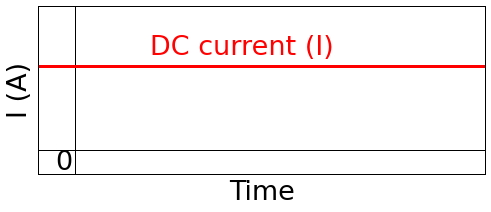

In [119]:
intind = range(4,15)
time_on = np.linspace(0, 0.5, 61)
time_off = time_on+time_on[-1]
eta = 0.
tau = 0.1
temp_on = petaonfun(eta, tau, time_on)*0.7
temp_off = petaofffun(eta, tau, time_on)

fig, ax = plt.subplots(1,1, figsize  = (8,3))
ax.plot(np.r_[-0.2,1.2],np.zeros(2), 'k-')
ax.plot(np.ones(2)*time_on[0]-0.002,np.r_[-0.2,1.2], 'k-')
time = np.r_[-0.1, 1.1]
ax.plot(time, np.ones_like(time)*0.7, 'r-', lw = 3)
ax.fill_between(time_off[intind], temp_off[intind], where=np.zeros(time_off[intind].size)<=temp_off[intind], color='k', alpha = 0.2)
ax.set_ylim(-0.2, 1.2)
ax.set_xlim(-0.1, 1.1)
ax.grid(True)
ax.set_xlabel('Time')
ax.set_ylabel('I (A)')
ax.text(0.2, 0.8, 'DC current (I)', color="r")
ax.text(-0.05, -0.16, '0', color="k")

ax.set_yticks([])
ax.set_xticks([])
fig.savefig('./CurrentDC.png', dpi = 100)

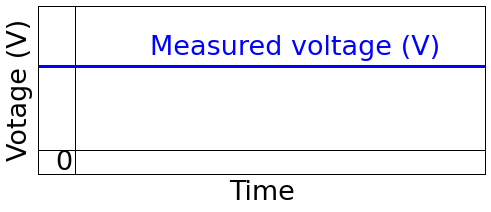

In [135]:
intind = range(4,15)
time_on = np.linspace(0, 0.5, 61)
time_off = time_on+time_on[-1]
eta = 0.
tau = 0.1
temp_on = petaonfun(eta, tau, time_on)*0.7
temp_off = petaofffun(eta, tau, time_on)

fig, ax = plt.subplots(1,1, figsize  = (8,3))
ax.plot(np.r_[-0.2,1.2],np.zeros(2), 'k-')
ax.plot(np.ones(2)*time_on[0]-0.002,np.r_[-0.2,1.2], 'k-')
time = np.r_[-0.1, 1.1]
ax.plot(time, np.ones_like(time)*0.7, 'b-', lw = 3)
ax.fill_between(time_off[intind], temp_off[intind], where=np.zeros(time_off[intind].size)<=temp_off[intind], color='k', alpha = 0.2)
ax.set_ylim(-0.2, 1.2)
ax.set_xlim(-0.1, 1.1)
ax.grid(True)
ax.set_xlabel('Time')
ax.set_ylabel('Votage (V)')
ax.text(0.2, 0.8, 'Measured voltage (V)', color="b")
ax.text(-0.05, -0.16, '0', color="k")

ax.set_yticks([])
ax.set_xticks([])
fig.savefig('./CurrentDC.png', dpi = 100)

In [122]:
f = 4
nt = 100
I = 0.5
out = I*np.repeat(np.r_[np.ones(nt), np.zeros(nt),-np.ones(nt), np.zeros(nt)].reshape([1,-1]), f, axis=0).flatten()
time = np.arange(out.size)/(out.size-1.)
voltage = Waveform.CausalConv(out, petaI(0.2, 0.05, time), time)

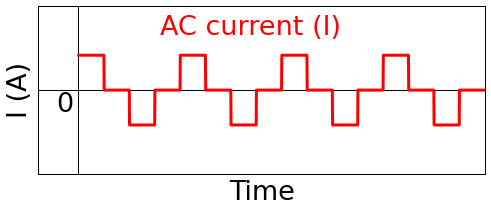

In [123]:
fig, ax = plt.subplots(1,1, figsize  = (8,3))
ax.plot(np.r_[-0.2,1.2],np.zeros(2), 'k-')
ax.plot(np.ones(2)*time_on[0]-0.002,np.r_[-1.2,1.2], 'k-')
ax.plot(time, out, 'r-', lw = 3)
ax.set_ylim(-1.2, 1.2)
ax.set_xlim(-0.1, 1.)
ax.grid(True)
ax.set_xlabel('Time')
ax.set_ylabel('I (A)')
ax.text(0.2, 0.8, 'AC current (I)', color="r")
ax.text(-0.05, -0.3, '0', color="k")

ax.set_yticks([])
ax.set_xticks([])
fig.savefig('./CurrentAC.png', dpi = 100)

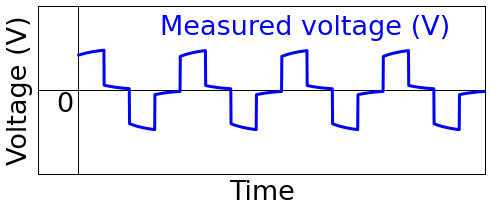

In [124]:
fig, ax = plt.subplots(1,1, figsize  = (8,3))
ax.plot(np.r_[-0.2,1.2],np.zeros(2), 'k-')
ax.plot(np.ones(2)*time_on[0]-0.002,np.r_[-1.2,1.2], 'k-')
ax.plot(time, voltage+out, 'b-', lw = 3)
ax.set_ylim(-1.2, 1.2)
ax.set_xlim(-0.1, 1.)
ax.grid(True)
ax.set_xlabel('Time')
ax.set_ylabel('Voltage (V)')
ax.text(0.2, 0.8, 'Measured voltage (V)', color="b")
ax.text(-0.05, -0.3, '0', color="k")

ax.set_yticks([])
ax.set_xticks([])
fig.savefig('./VoltageAC.png', dpi = 100)

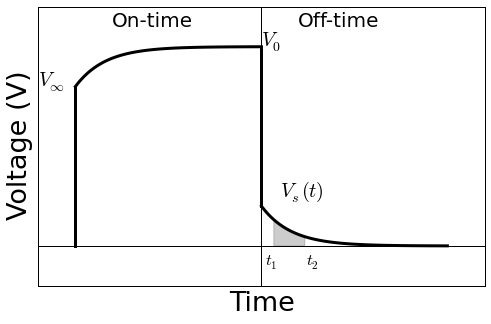

In [134]:
intind = range(4,15)
time_on = np.linspace(0, 0.5, 61)
time_off = time_on+time_on[-1]
eta = 0.2
tau = 0.1
temp_on = petaonfun(eta, tau, time_on)*1.
temp_off = petaofffun(eta, tau, time_on)

# plt.xkcd()
fig, ax = plt.subplots(1,1, figsize  = (8,5))
ax.plot(time_on, temp_on, 'k-', lw = 3)
ax.plot(time_off, temp_off, 'k-', lw = 3)
ax.fill_between(time_off[intind], temp_off[intind], where=np.zeros(time_off[intind].size)<=temp_off[intind], color='k', alpha = 0.2)
ax.set_ylim(-0.2, 1.2)
ax.set_xlim(-0.1, 1.1)
ax.grid(True)
ax.set_xlabel('Time')
ax.set_ylabel('Voltage (V)')

ax.plot(np.r_[time_on[0], time_on[0]]-0.002, np.r_[0., temp_on[0]], 'k-', lw = 3)
ax.plot(np.r_[time_on[-1], time_on[-1]]-0.002, np.r_[temp_off[0], 1.], 'k-', lw = 3)
ax.plot(np.r_[-0.2,1.2],np.zeros(2), 'k-')
ax.plot(np.ones(2)*time_on[-1]-0.002,np.r_[-0.2,1.2], 'k-')

ax.text(-0.1, 0.8, '$V_{\infty}$', fontsize = 20)
ax.text(0.5, 1., '$V_0$', fontsize = 20)
ax.text(0.55, 0.25, '$V_s(t)$', fontsize = 20)
ax.text(0.51, -0.1, '$t_1$', fontsize = 16)
ax.text(0.62, -0.1, '$t_2$', fontsize = 16)
ax.text(0.1, 1.1, 'On-time', fontsize = 20)
ax.text(0.6, 1.1, 'Off-time', fontsize = 20)
ax.set_yticks([])
ax.set_xticks([])
fig.savefig('./DCIPcurve.png', dpi = 100)